In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pylab import *

In [2]:
data=pd.read_csv('E:/研一上学期课程作业及教材ppt/数据挖掘/bra/bra.csv')
colors=pd.read_csv('E:/研一上学期课程作业及教材ppt/数据挖掘/bra/colors.csv')

In [3]:
'''
因为data中的颜色分类过多过杂，利用colors文件将data中的颜色重新分类
例如 data中的虾粉 和 粉色 在重新分类之后均为 粉色
'''
#利用字典实现重新分类,用color文件中的第一列作key 第二列作value
key_list=colors['0']
value_list=colors['1']
dict_color=dict(zip(key_list,value_list))
#在原始数据中加入新列 新列的数值是新的分类，利用字典批量替换
data.insert(3,'color_New','')
data['color_New']=data['productColor'].replace(dict_color)

In [4]:
#加入新列，用来存放统一后的尺码
data.insert(4,'size_New','')
'''
将内衣尺码统一以下围表示 e.g. 75B
S M L 的换算大致按照：
S-70B M-75B L-80B XL-85B
'''
#x首先处理尺码中按照上下围划分的部分
pattern1=r'(\d{2}[A-Z]|[A-Z]\d{2})'
#用正则表达式，首先找出尺码表中按上下围计算的部分(数字在前或者字母在前)
regex1=re.compile(pattern1,flags=re.IGNORECASE)
for i in range(len(data['productSize'])):
    a=regex1.findall(str(data['productSize'][i]))
    if len(regex1.findall(str(data['productSize'][i])))==2:
    #如果尺码中既包含上围也包含下围，记录下围
        data['size_New'][i]=max(a)
    else:
        data['size_New'][i]=regex1.findall(str(data['productSize'][i]))
#将列表元素中的字母改成大写，并且格式统一
    data['size_New'][i]=str(data['size_New'][i]).upper()

In [5]:
#继续处理剩下的尺码格式S-70B M-75B L-80B XL-85B
pattern2=r'(S|M|L|XL)'
#用正则表达式，找出尺码表中按照SMLXL标注的部分
regex2=re.compile(pattern2,flags=re.IGNORECASE)
for i in range(len(data['productSize'])):
    if data['size_New'][i]=='[]':
        data['size_New'][i]=regex2.findall(str(data['productSize'][i]))
        data['size_New'][i]=str(data['size_New'][i])
    #将字符串中的特殊符号去掉
    data['size_New'][i]=data['size_New'][i].replace('[\'','')
    data['size_New'][i]=data['size_New'][i].replace('\']','')

In [6]:
#创建字典，将SMXL和其它字母在前的下围尺码转化为标准的数字+字母的尺码
dict_size={'S':'70B','M':'75B','L':'80B','XL':'85B','B80':'80B','B75':'75B','C80':'80C','C75':'75C','B70':'70B','C70':'70C',
          'A75':'75A','A80':'80A','A70':'70A','A85':'85A','C85':'85C','B85':'85B'}
data['size_New']=data['size_New'].replace(dict_size)

In [7]:
#提取数据中的年份信息，用来后续判断颜色和尺码偏好是否随年份的变化而变化
data.insert(5,'Year','')
for i in range(len(data)):
    try:
        data.Year[i]=data.creationTime[i][:4]
    except:
        data.Year[i]=None

In [8]:
#提取数据中的月份信息，用来后续判断颜色和尺码偏好是否随月份的变化而变化
data.insert(6,'Month','')
for i in range(len(data)):
    try:
        data.Month[i]=data.creationTime[i][5:7]
    except:
        data.Month[i]=None

In [9]:
#去掉多余的两列
data=data.drop(['productColor','productSize'],axis=1)
#去掉缺失值和只有上围的两条数据
data=data.drop(index=(data.loc[(data['size_New']=='[]')].index))
data=data.drop(index=(data.loc[(data['size_New']=='38C')].index))
data=data.drop(index=(data.loc[(data.Year==None)].index))

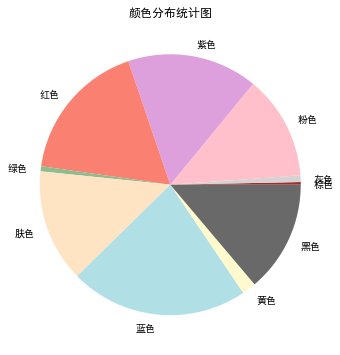

In [10]:
#分类汇总各个颜色的数目，绘制饼状图
count_Color=data.groupby('color_New').color_New.count()
#设置中文输出
mpl.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(6,6))
#设置颜色使得饼的颜色与它代表的颜色一致
color_set=['brown','lightgrey','pink','plum','salmon','darkseagreen','bisque','powderblue','lemonchiffon','dimgray']
plt.pie(count_Color,labels=count_Color.index,colors=color_set)
plt.title('颜色分布统计图')
plt.show()

In [11]:
#分类汇总各个尺寸的数目,由于尺码数过多，取前十二个（数量>100的尺码）
count_Size=data.groupby('size_New').size_New.count()
count_Size_12=count_Size.sort_values(ascending=False)[:12]

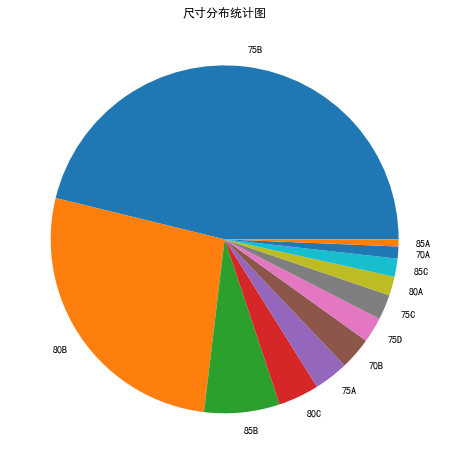

In [12]:
#设置中文输出
mpl.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(8,8))
#设置颜色使得饼的颜色与它代表的颜色一致
plt.pie(count_Size_12,labels=count_Size_12.index)
plt.title('尺寸分布统计图')
plt.show()

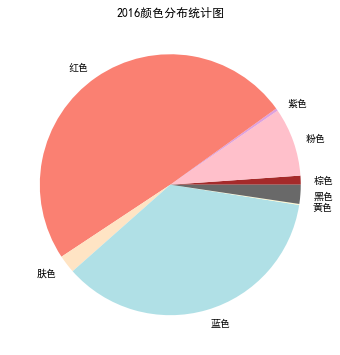

In [13]:
#分类汇总各个颜色的数目，绘制饼状图
count_Color_Year_2016=data.loc[data.Year=='2016']
count_Color_Year_2016=count_Color_Year_2016.groupby('color_New').color_New.count()
#设置中文输出
mpl.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(6,6))
#设置颜色使得饼的颜色与它代表的颜色一致
color_set=['brown','pink','plum','salmon','bisque','powderblue','lemonchiffon','dimgray']
plt.pie(count_Color_Year_2016,labels=count_Color_Year_2016.index,colors=color_set)
plt.title('2016颜色分布统计图')
plt.show()

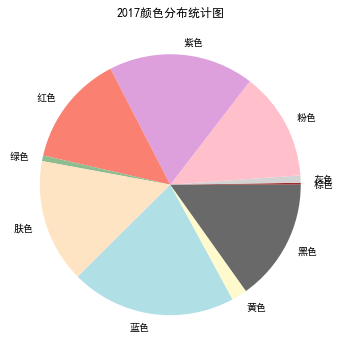

In [14]:
#分类汇总各个颜色的数目，绘制饼状图
count_Color_Year_2017=data.loc[data.Year=='2017']
count_Color_Year_2017=count_Color_Year_2017.groupby('color_New').color_New.count()
#设置中文输出
mpl.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(6,6))
#设置颜色使得饼的颜色与它代表的颜色一致
color_set=['brown','lightgrey','pink','plum','salmon','darkseagreen','bisque','powderblue','lemonchiffon','dimgray']
plt.pie(count_Color_Year_2017,labels=count_Color_Year_2017.index,colors=color_set)
plt.title('2017颜色分布统计图')
plt.show()

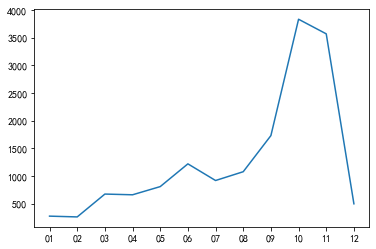

In [15]:
#按照月份画出销售量的线形图
count_Size_Month=data.groupby('Month').size_New.count()
plt.plot(count_Size_Month.index,count_Size_Month)
plt.show()

# 开店策略
## 从尺码来看
    从尺码分布可以看出,75B,80B,85B占多数，而其它尺码在剩余的部分里近似于均匀分布。所以在进货时，应该多储备75B,80B,85B尺码。对于剩下的尺码可以酌量备货。
 ## 从颜色来看
    因为2014年和2015年仅分别有一条数据，均是蓝色，所以主要分析2016年和2017年的数据，可以发现在2016年红色和蓝色占比非常大，而在2017年红、肤、蓝、粉、紫等颜色均占有较大比例。排除2016年数据不全的原因，可以认为原因一是随着电商的发展，可供选择的商品日益丰富，消费者的选择日益多元化，二是颜色的选择跟当年的流行也有较大的关系。在进货时，建议备齐常见的颜色，并关注当年的流行趋势，对当年的流行色多备货，以满足消费者的多元化需求。
## 从时间来看
    从时间来看，可以看出9月，10月，11月是销售的旺季，12月，1月，2月是销售的淡季。 3-8月则相对比较平均，所以在进货时，应当在旺季之前多备货，在淡季可以减少进货。